In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.metrics import classification_report_imbalanced, sensitivity_specificity_support
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")

In [3]:
data.head()

,Unnamed: 0,k__Viruses.f__Phycodnaviridae.g__Prasinovirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus,k__Viruses.f__Poxviridae.g__Parapoxvirus,k__Viruses.f__Papillomaviridae.g__Dyolambdapapillomavirus,k__Viruses.o__Mononegavirales.f__Bornaviridae.g__Bornavirus,k__Viruses.f__Bicaudaviridae.g__Bicaudavirus,k__Viruses.o__Picornavirales.f__Picornaviridae.g__Aquamavirus,...,k__Bacteria.p__Synergistetes.c__Synergistia.o__Synergistales.f__Synergistaceae.g__Cloacibacillus,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Lachnospiraceae.g__Sellimonas,k__Archaea.p__Thaumarchaeota.g__Candidatus_Nitrosotenuis,k__Bacteria.p__Rhodothermaeota.c__Balneolia.o__Balneolales.f__Balneolaceae.g__Gracilimonas,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Thermoproteales.f__Thermoproteaceae.g__Caldivirga,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Casaltella,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Desulfurococcales.f__Desulfurococcaceae.g__Thermosphaera,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Neisseriales.f__Chromobacteriaceae.g__Deefgea,k__Bacteria.p__Deferribacteres.c__Deferribacteres.o__Deferribacterales.f__Deferribacteraceae.g__Geovibrio,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Subdoligranulum
0,s12859,0,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s12878,0,0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s12857,2,0,484,0,8,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,s12882,4,0,96,0,2,0,0,2,4,...,0,0,0,0,0,0,0,0,0,0
4,s12871,2,0,128,0,16,0,4,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels.head()

,Sample,disease_type
0,s12859,colon cancer
1,s12878,colon cancer
2,s12857,colon cancer
3,s12882,colon cancer
4,s12871,colon cancer


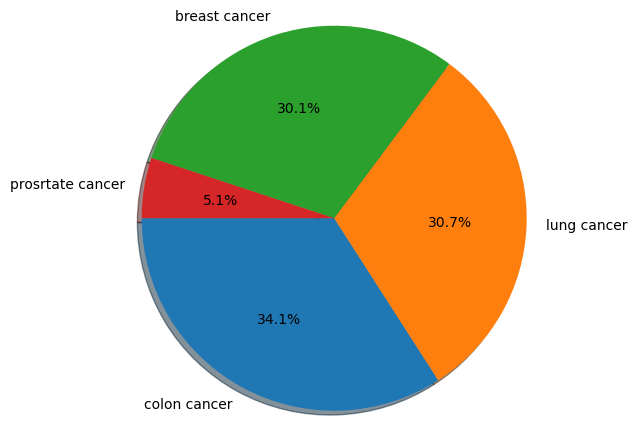

In [5]:
plt.figure( figsize= (5,5))
plt.pie((labels.disease_type.value_counts())/100 , labels=pd.unique(labels.disease_type), startangle
=180 , autopct='%1.1f%%' ,textprops={ 'fontsize': 10 , 'rotation':0}, shadow=True, radius=1.25)
plt.show()

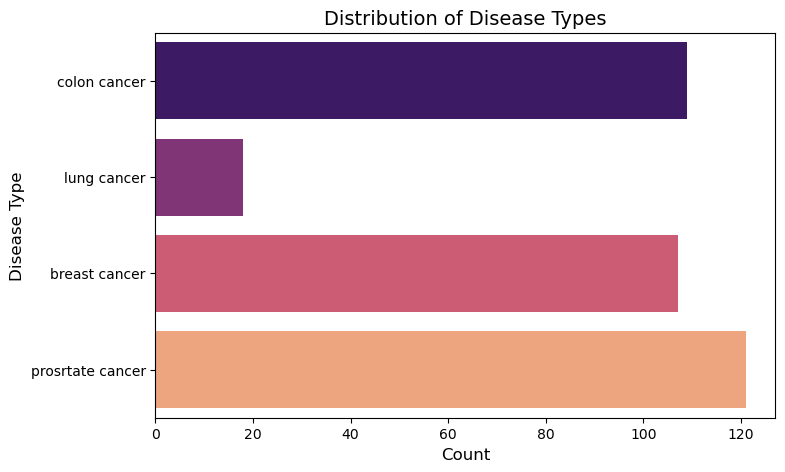

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(y=labels.disease_type, hue=labels.disease_type, palette='magma', dodge=False, legend=False)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Disease Type', fontsize=12)
plt.title('Distribution of Disease Types', fontsize=14)
plt.show()

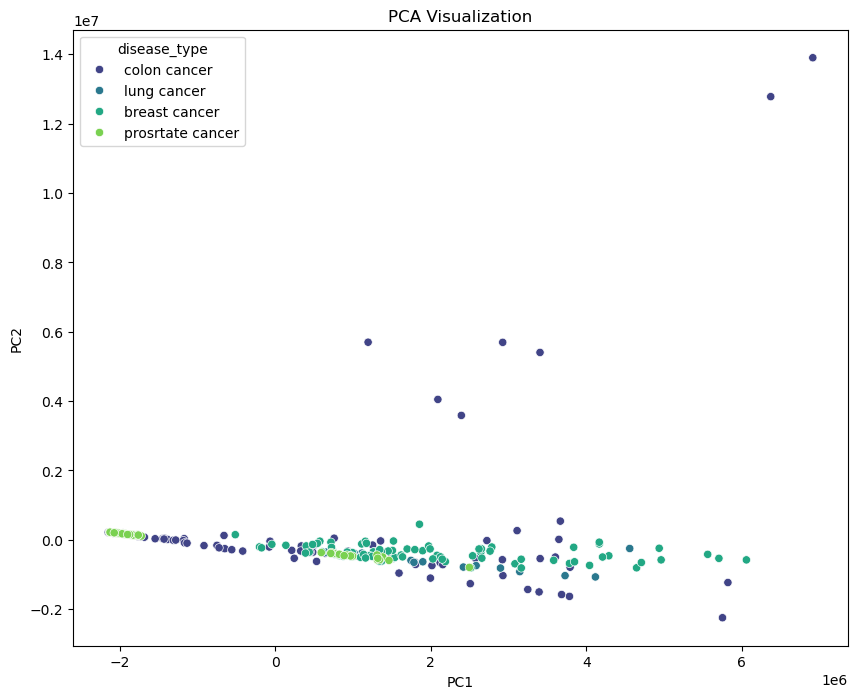

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data.iloc[:, 1:])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_df, labels['disease_type']], axis=1)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='disease_type', data=final_df, palette='viridis')
plt.title('PCA Visualization')
plt.show()

# RANDOM FOREST

In [8]:
X = data.drop(['Unnamed: 0'], axis=1)
y = labels.disease_type

In [9]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'max_features': [7, 19, 21],
    'min_samples_split': [3, 7, 11],
    'max_depth': [3, 7, 11]
}

In [12]:
# StratifiedKFold kullanarak çapraz doğrulama stratejisini belirle
cv = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 11, 'max_features': 21, 'min_samples_split': 3, 'n_estimators': 50}
Best accuracy: 0.9577081000373274


In [13]:
best_params_rf = grid_search.best_params_

In [14]:
rf = RandomForestClassifier(max_depth=best_params_rf['max_depth'], 
                            max_features=best_params_rf['max_features'], 
                            min_samples_split=best_params_rf['min_samples_split'], 
                            n_estimators=best_params_rf['n_estimators'])
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features=21, min_samples_split=3,
                       n_estimators=50)

In [15]:
y_pred = rf.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.9154929577464789

In [17]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest CV Accuracy:", cross_val_score(rf, X_test, y_test, cv=3).mean())
print(classification_report_imbalanced(y_test, y_pred, target_names=label_encoder.classes_))

Random Forest Accuracy: 0.9154929577464789


\\?\C:\Users\erens\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Random Forest CV Accuracy: 0.78743961352657
                        pre       rec       spe        f1       geo       iba       sup

   breast cancer       1.00      0.72      1.00      0.84      0.85      0.70        18
    colon cancer       0.89      0.96      0.93      0.93      0.95      0.90        26
     lung cancer       1.00      1.00      1.00      1.00      1.00      1.00         2
prosrtate cancer       0.89      1.00      0.93      0.94      0.97      0.94        25

     avg / total       0.92      0.92      0.95      0.91      0.93      0.87        71



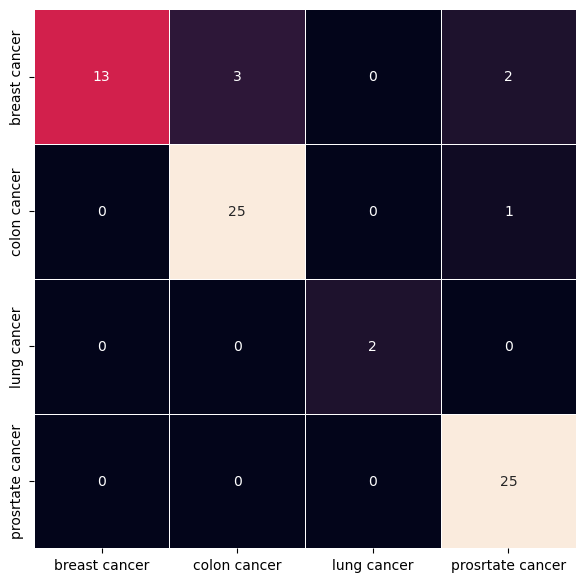

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7, cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.show()


# XGBoost

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [21]:
# Etiketleri sayısal hale getirme
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [22]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# SMOTE kullanarak veri setini yeniden örnekleme
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [24]:
# XGBoost model ve parametreler
xgboost = XGBClassifier(random_state=42)
xgboost_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.6, 0.8, 1],
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

In [25]:
# GridSearchCV kullanarak en iyi hiperparametreleri bulma
xgboost_cv_model = GridSearchCV(xgboost, xgboost_params, cv=2, n_jobs=-1, verbose=2)
xgboost_cv_model.fit(X_resampled, y_resampled)

Fitting 2 folds for each of 486 candidates, totalling 972 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 500],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.6, 0.8, 1]},
             verbose=2)

In [26]:
# En iyi hiperparametreleri ve doğruluğu yazdırma
print("Best parameters:", xgboost_cv_model.best_params_)
print("Best accuracy:", xgboost_cv_model.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.8}
Best accuracy: 0.9768041237113403


In [27]:
# En iyi hiperparametrelerle XGBoost modelini eğitme
best_params_xgb = xgboost_cv_model.best_params_
xgboost = XGBClassifier(
    learning_rate=best_params_xgb['learning_rate'],
    max_depth=best_params_xgb['max_depth'],
    n_estimators=best_params_xgb['n_estimators'],
    subsample=best_params_xgb['subsample'],
    reg_alpha=best_params_xgb['reg_alpha'],
    reg_lambda=best_params_xgb['reg_lambda'],
    random_state=42
)
xgboost.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
# Tahminler ve değerlendirme
y_pred = xgboost.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

XGBoost Accuracy: 0.9577464788732394


In [29]:
# StratifiedKFold kullanarak çapraz doğrulama
# y_train'i pandas Series'e dönüştürme
y_train_series = pd.Series(y_train)
n_splits = min(2, y_train_series.value_counts().min())  # En az örneğe sahip sınıfın sayısına göre ayarlanır
skf = StratifiedKFold(n_splits=n_splits)
cv_scores = cross_val_score(xgboost, X_test, y_test, cv=skf)
print("XGBoost CV Accuracy:", cv_scores.mean())

XGBoost CV Accuracy: 0.7031746031746031


In [30]:
# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                  precision    recall  f1-score   support

   breast cancer       1.00      0.95      0.98        21
    colon cancer       1.00      0.91      0.95        22
     lung cancer       0.67      1.00      0.80         4
prosrtate cancer       0.96      1.00      0.98        24

        accuracy                           0.96        71
       macro avg       0.91      0.97      0.93        71
    weighted avg       0.97      0.96      0.96        71



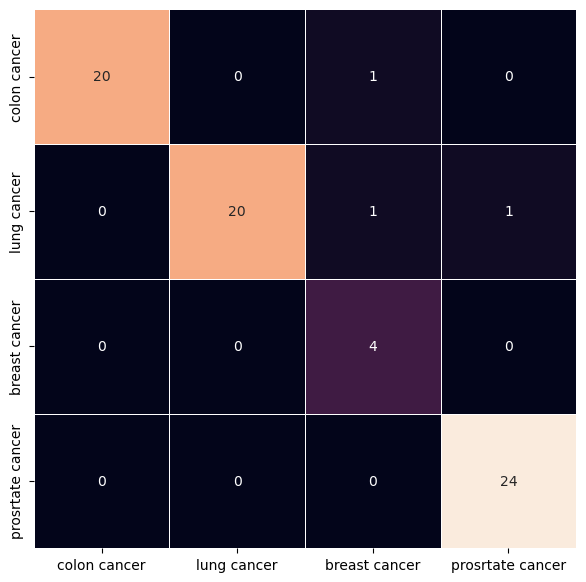

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False, xticklabels=pd.unique(labels.disease_type),yticklabels=pd.unique(labels.disease_type))
plt.show()

# Conclusion

In [63]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='micro')
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9577464788732394
Specificity: 0.9859154929577465


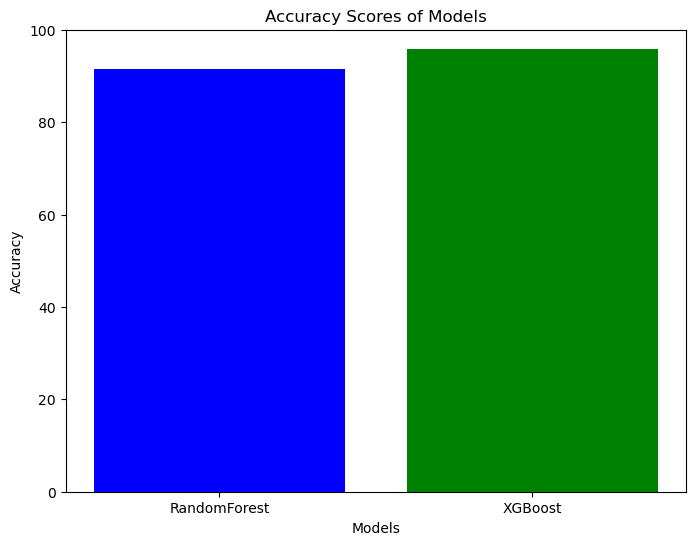

Accuracy Scores:
RandomForest: 91.55
XGBoost: 95.77


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_and_print_accuracy_scores(model_names, accuracy_scores):
    # Doğruluk skorlarını içeren bir veri çerçevesi oluşturun
    accuracy_df = pd.DataFrame({
        'Models': model_names,
        'Accuracy': accuracy_scores
    })

    # Çubuk grafiğini oluşturun
    plt.figure(figsize=(8, 6))
    plt.bar(accuracy_df['Models'], accuracy_df['Accuracy'], color=['blue', 'green'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Scores of Models')
    plt.ylim(0, 100)
    plt.show()

    # Skorları ekrana yazdır
    print("Accuracy Scores:")
    for model, score in zip(model_names, accuracy_scores):
        print(f"{model}: {score}")

# Örnek model isimleri ve skorları
model_names = ['RandomForest', 'XGBoost']

# Fonksiyonu çağırarak çubuk grafiğini oluşturun ve skorları yazdırın
plot_and_print_accuracy_scores(model_names, accuracy_scores)
